# Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np 
import seaborn as sns 
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
%matplotlib inline

# Importing Dataset

In [2]:
file_name='data/cars_price.csv'
df=pd.read_csv(file_name)

In [3]:
df.head()

,Unnamed: 0,make,model,priceUSD,year,condition,mileage(kilometers),fuel_type,volume(cm3),color,transmission,drive_unit,segment
0,0,honda,accord,565,1993,with mileage,960015.0,petrol,2000.0,black,mechanics,front-wheel drive,D
1,1,ford,fusion,5550,2008,with mileage,172000.0,diesel,1400.0,silver,mechanics,front-wheel drive,M
2,2,nissan,teana,8300,2008,with mileage,223000.0,petrol,2500.0,purple,auto,front-wheel drive,D
3,3,volkswagen,fox,3300,2005,with mileage,140000.0,petrol,1200.0,blue,mechanics,front-wheel drive,A
4,4,nissan,primera,2450,2002,with damage,413000.0,diesel,2200.0,burgundy,mechanics,front-wheel drive,D


In [4]:
result = df.dtypes
print(result)

Unnamed: 0               int64
make                    object
model                   object
priceUSD                 int64
year                     int64
condition               object
mileage(kilometers)    float64
fuel_type               object
volume(cm3)            float64
color                   object
transmission            object
drive_unit              object
segment                 object
dtype: object


In [5]:
df.describe()

,Unnamed: 0,priceUSD,year,mileage(kilometers),volume(cm3)
count,40000.00000,40000.000000,40000.000000,4.000000e+04,39970.000000
mean,19999.50000,7430.383775,2003.485625,2.434332e+05,2103.201676
std,11547.14972,8338.242134,8.114896,3.167033e+05,938.724653
min,0.00000,95.000000,1938.000000,0.000000e+00,500.000000
25%,9999.75000,2350.000000,1998.000000,1.370000e+05,1600.000000
50%,19999.50000,5350.000000,2004.000000,2.280000e+05,1995.000000
75%,29999.25000,9850.000000,2010.000000,3.087610e+05,2300.000000
max,39999.00000,195000.000000,2019.000000,9.999999e+06,20000.000000


In [6]:
df.corr()['priceUSD'].sort_values()

mileage(kilometers)   -0.171794
Unnamed: 0             0.005429
volume(cm3)            0.275745
year                   0.608822
priceUSD               1.000000
Name: priceUSD, dtype: float64

# Data Wrangling

In [7]:
#Checking for Null values in column
df.isnull().sum()

Unnamed: 0                0
make                      0
model                     0
priceUSD                  0
year                      0
condition                 0
mileage(kilometers)       0
fuel_type                 0
volume(cm3)              30
color                     0
transmission              0
drive_unit             1345
segment                3755
dtype: int64

In [8]:
#Replacing Null  values in Volume comumn with mean value
mean=df['volume(cm3)'].mean()
df['volume(cm3)'].replace(np.nan,mean, inplace=True)

# Visualizing and Examining Data

First, Let's have a look over our target column

(95.0, 195000.0)

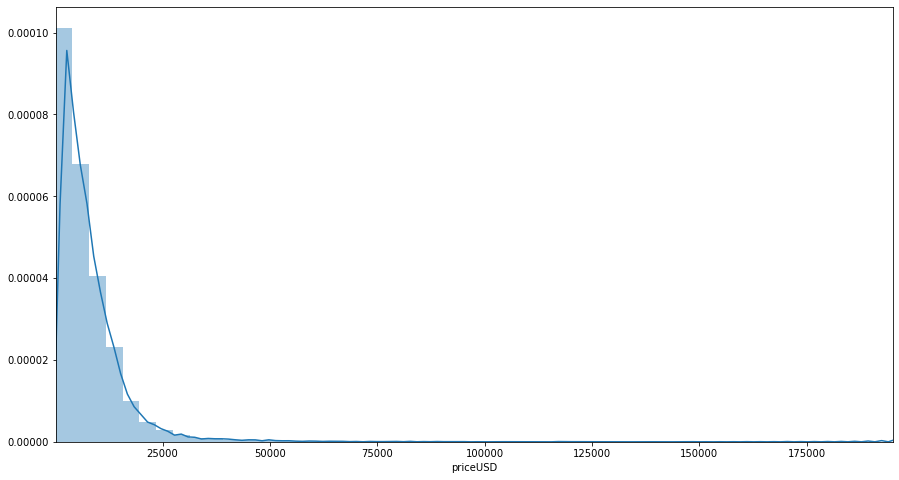

In [9]:
f, ax = plt.subplots(figsize=(15,8))
sns.distplot(df['priceUSD'])
plt.xlim([95,195000])

# Plots to compare predictor variable with target

**Volume(Cm3) v/s PriceUSD**

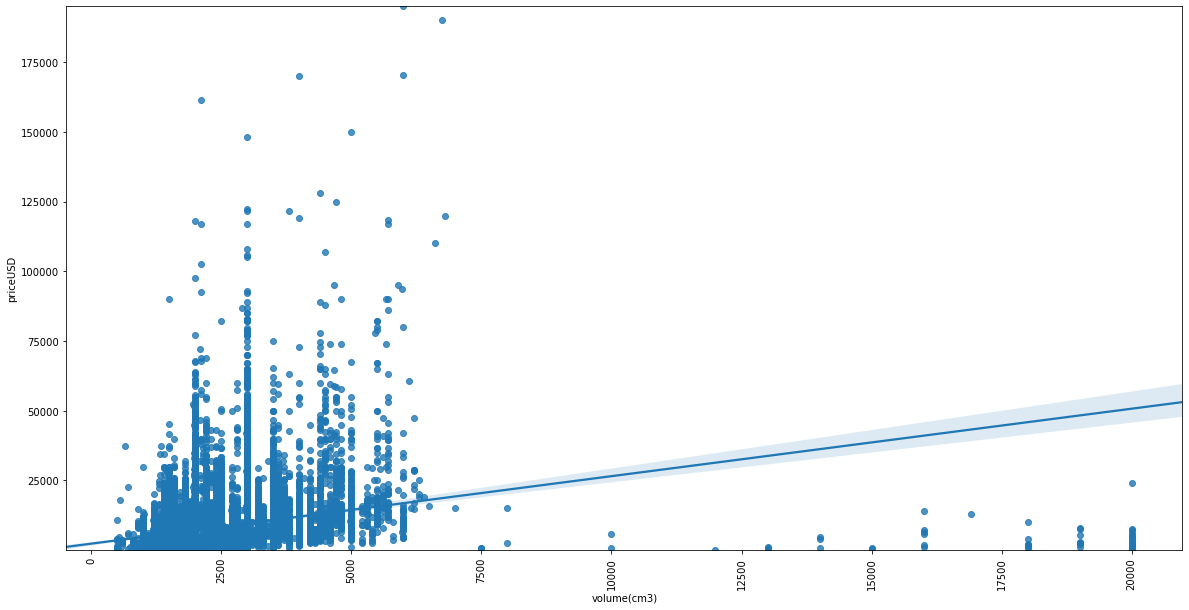

In [10]:
var = 'volume(cm3)'
data = pd.concat([df['priceUSD'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(20, 10))
fig = sns.regplot(x=var, y="priceUSD", data=df)
fig.axis(ymin=95, ymax=195000);
plt.xticks(rotation=90);

**Year v/s PriceUSD**

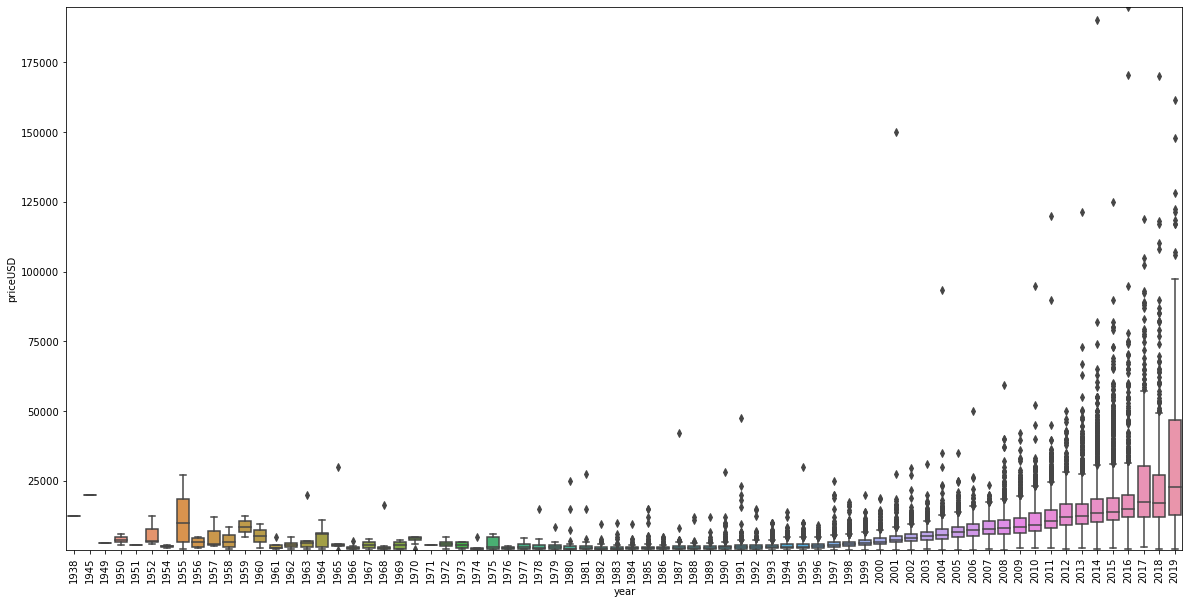

In [11]:
var = 'year'
data = pd.concat([df['priceUSD'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(20, 10))
fig = sns.boxplot(x=var, y="priceUSD", data=data)
fig.axis(ymin=95, ymax=195000);
plt.xticks(rotation=90);

New car models are having more resale value than older one.

**Fuel Type v/s PriceUSD**

<AxesSubplot:xlabel='fuel_type', ylabel='priceUSD'>

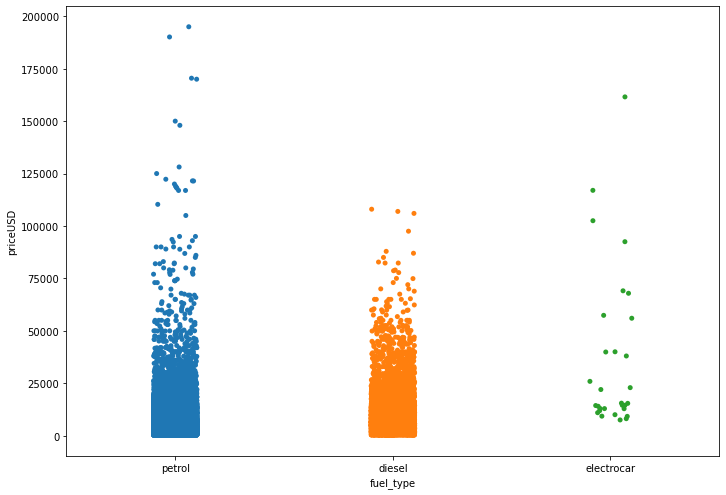

In [12]:
var = 'fuel_type'
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
sns.stripplot(x = var, y ='priceUSD', data = df) 

**Make**

<Figure size 1440x720 with 0 Axes>

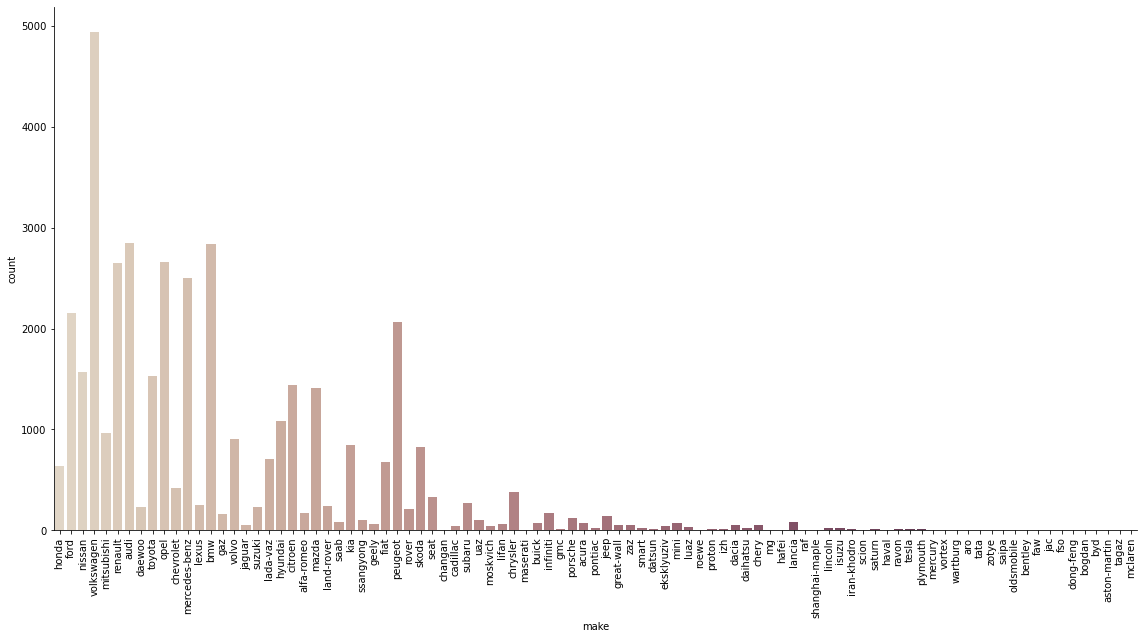

In [13]:
var = "make"
plt.figure(figsize=(20, 10))
sns.catplot(x=var, kind="count", palette="ch:.25", height=8, aspect=2, data=df);
plt.xticks(rotation=90);

Major number of cars belongs to **Volkeswagen** followed by **Audi** and **BMW**

**Transmission v/s PriceUSD**

<AxesSubplot:xlabel='transmission', ylabel='priceUSD'>

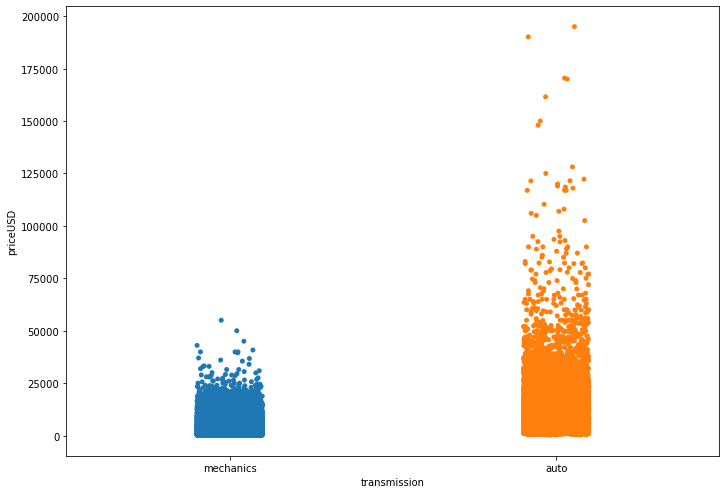

In [14]:
var = 'transmission'
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
sns.stripplot(x = var, y ='priceUSD', data = df) 

**Condition v/s PriceUSD**

<AxesSubplot:xlabel='condition', ylabel='priceUSD'>

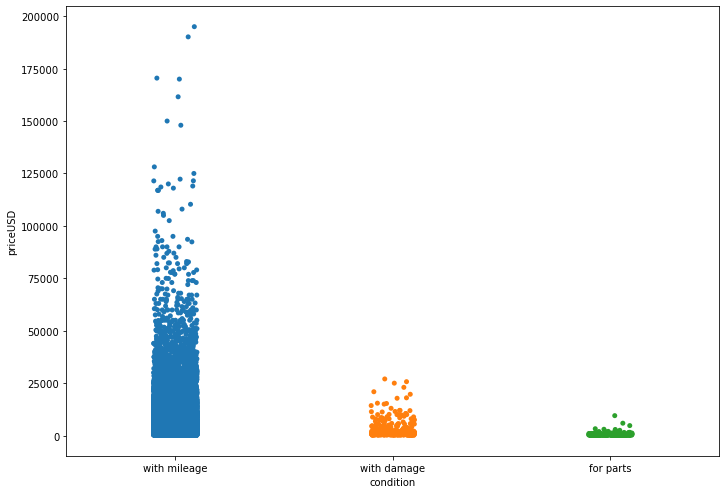

In [15]:
var = 'condition'
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
sns.stripplot(x = var, y ='priceUSD', data = df) 

Cars with good mileage is having more resale value

**Drive Unit v/s PriceUSD**

<AxesSubplot:xlabel='drive_unit', ylabel='priceUSD'>

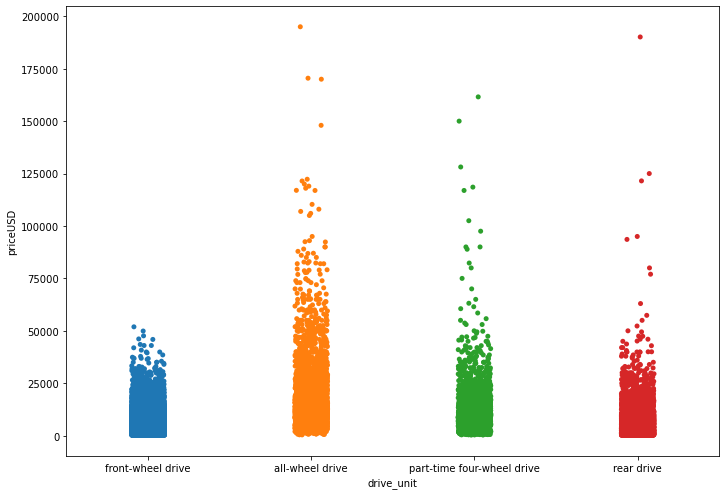

In [16]:
var = 'drive_unit'
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
sns.stripplot(x = var, y ='priceUSD', data = df) 

**Color v/s PriceUSD**

<AxesSubplot:xlabel='color', ylabel='priceUSD'>

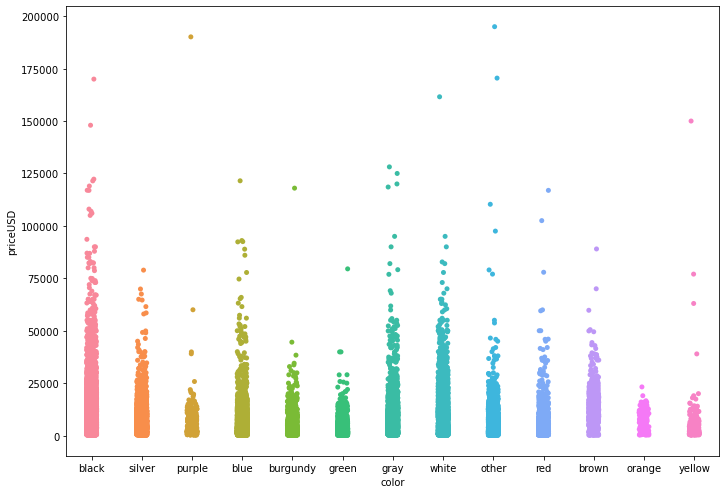

In [17]:
var = 'color'
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
sns.stripplot(x = var, y ='priceUSD', data = df) 

**Segment v/s PriceUSD**

<AxesSubplot:xlabel='segment', ylabel='priceUSD'>

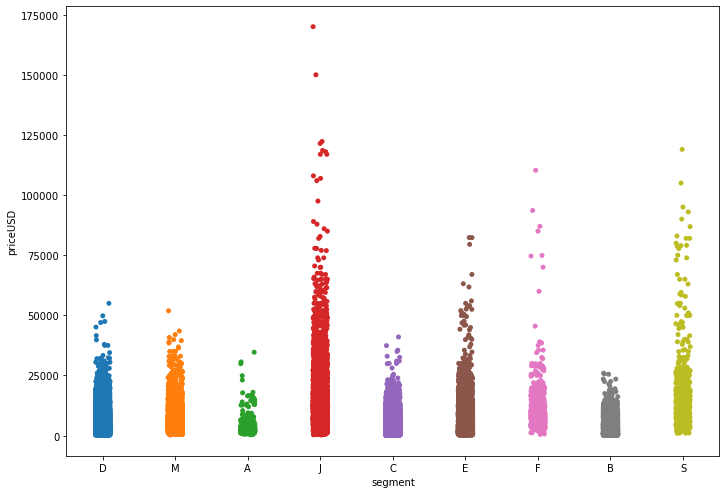

In [18]:
var = 'segment'
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
sns.stripplot(x = var, y ='priceUSD', data = df) 

# Working with Categorical Data

In [19]:
df['drive_unit'].isnull().sum()

1345

In [20]:
df['drive_unit'].value_counts()

front-wheel drive             27074
rear drive                     4809
all-wheel drive                4176
part-time four-wheel drive     2596
Name: drive_unit, dtype: int64

Major drive units are front wheel, so we will replace missing values with **front-wheel drive** 

In [21]:
df['drive_unit'].replace(np.nan,'front-wheel drive', inplace=True)
df['drive_unit'].isnull().sum()

0

One hot encoding

In [22]:
var = 'drive_unit'
Drive = df[[var]]
Drive = pd.get_dummies(Drive,drop_first=True)
Drive.head()

,drive_unit_front-wheel drive,drive_unit_part-time four-wheel drive,drive_unit_rear drive
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [23]:
df["fuel_type"].value_counts()

petrol        25869
diesel        14101
electrocar       30
Name: fuel_type, dtype: int64

In [24]:
var = 'fuel_type'
Fuel = df[[var]]
Fuel = pd.get_dummies(Fuel,drop_first=True)
Fuel.head()

,fuel_type_electrocar,fuel_type_petrol
0,0,1
1,0,0
2,0,1
3,0,1
4,0,0


In [25]:
var = 'transmission'
df[var].value_counts()

mechanics    25630
auto         14370
Name: transmission, dtype: int64

one hot encoding 

In [26]:
Transmission = df[[var]]
Transmission = pd.get_dummies(Transmission,drop_first=True)
Transmission.head()

,transmission_mechanics
0,1
1,1
2,0
3,1
4,1


In [27]:
var = 'condition'
df[var].value_counts()

with mileage    39337
with damage       341
for parts         322
Name: condition, dtype: int64

**Condition** column has ordered data so we will be using **Label Encoding**

In [28]:
df.replace({"with mileage":1,"with damage":2,"for parts": 3},inplace=True)
df.head()

,Unnamed: 0,make,model,priceUSD,year,condition,mileage(kilometers),fuel_type,volume(cm3),color,transmission,drive_unit,segment
0,0,honda,accord,565,1993,1,960015.0,petrol,2000.0,black,mechanics,front-wheel drive,D
1,1,ford,fusion,5550,2008,1,172000.0,diesel,1400.0,silver,mechanics,front-wheel drive,M
2,2,nissan,teana,8300,2008,1,223000.0,petrol,2500.0,purple,auto,front-wheel drive,D
3,3,volkswagen,fox,3300,2005,1,140000.0,petrol,1200.0,blue,mechanics,front-wheel drive,A
4,4,nissan,primera,2450,2002,2,413000.0,diesel,2200.0,burgundy,mechanics,front-wheel drive,D


In [29]:
var = 'color'
df[var].value_counts()

black       8867
silver      7140
blue        5705
gray        4161
white       3774
green       2778
other       2367
red         1985
burgundy    1458
brown        947
purple       437
yellow       219
orange       162
Name: color, dtype: int64

One hot encoding 

In [30]:
Color = df[[var]]
Color = pd.get_dummies(Color,drop_first=True)
Color.head()

,color_blue,color_brown,color_burgundy,color_gray,color_green,color_orange,color_other,color_purple,color_red,color_silver,color_white,color_yellow
0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,1,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0,0


In [31]:
var = 'make'
df[var].value_counts()

volkswagen        4943
audi              2849
bmw               2839
opel              2662
renault           2650
                  ... 
dong-feng            1
fso                  1
bogdan               1
aston-martin         1
shanghai-maple       1
Name: make, Length: 93, dtype: int64

In [32]:
var = 'model'
df[var].value_counts()

passat        1532
5-seriya      1003
a6             896
golf           783
astra          698
              ... 
siena            1
uplander         1
expedition       1
ilx              1
403              1
Name: model, Length: 991, dtype: int64

Too much variation, we will drop **make and model** column

In [33]:
df['segment'].value_counts()

D    8985
C    7509
J    6161
M    4532
E    4391
B    3128
F     658
S     549
A     332
Name: segment, dtype: int64

In [34]:
df['segment'].replace(np.nan,'D', inplace=True)
df['segment'].isnull().sum()

0

**One hot encoding**

In [35]:
Segment = df["segment"]
Segment = pd.get_dummies(Color,drop_first=True)
Segment.head()

,color_blue,color_brown,color_burgundy,color_gray,color_green,color_orange,color_other,color_purple,color_red,color_silver,color_white,color_yellow
0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,1,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0,0


In [36]:
df['year'].value_counts()

2008    2264
1998    1993
2007    1909
2001    1881
1999    1880
        ... 
1938       1
1971       1
1945       1
1949       1
1951       1
Name: year, Length: 72, dtype: int64

# Preparing Model Data

In [37]:
# Concatinanting all features
final_train= pd.concat([df,Transmission,Drive,Fuel,Color,Segment],axis=1)
final_train.head()

,Unnamed: 0,make,model,priceUSD,year,condition,mileage(kilometers),fuel_type,volume(cm3),color,...,color_burgundy,color_gray,color_green,color_orange,color_other,color_purple,color_red,color_silver,color_white,color_yellow
0,0,honda,accord,565,1993,1,960015.0,petrol,2000.0,black,...,0,0,0,0,0,0,0,0,0,0
1,1,ford,fusion,5550,2008,1,172000.0,diesel,1400.0,silver,...,0,0,0,0,0,0,0,1,0,0
2,2,nissan,teana,8300,2008,1,223000.0,petrol,2500.0,purple,...,0,0,0,0,0,1,0,0,0,0
3,3,volkswagen,fox,3300,2005,1,140000.0,petrol,1200.0,blue,...,0,0,0,0,0,0,0,0,0,0
4,4,nissan,primera,2450,2002,2,413000.0,diesel,2200.0,burgundy,...,1,0,0,0,0,0,0,0,0,0


In [38]:
# Drop the unnecessary features from predictors features
final_train.drop(["Unnamed: 0","make","model","transmission","fuel_type","color","drive_unit","segment","priceUSD"],axis=1,inplace=True)
final_train.head()

,year,condition,mileage(kilometers),volume(cm3),transmission_mechanics,drive_unit_front-wheel drive,drive_unit_part-time four-wheel drive,drive_unit_rear drive,fuel_type_electrocar,fuel_type_petrol,...,color_burgundy,color_gray,color_green,color_orange,color_other,color_purple,color_red,color_silver,color_white,color_yellow
0,1993,1,960015.0,2000.0,1,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,2008,1,172000.0,1400.0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,2008,1,223000.0,2500.0,0,1,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
3,2005,1,140000.0,1200.0,1,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,2002,2,413000.0,2200.0,1,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [39]:
# Defining target variable
y = df['priceUSD']
y.head()

0     565
1    5550
2    8300
3    3300
4    2450
Name: priceUSD, dtype: int64

In [40]:
# Defining Predictors variable
X = final_train

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 25)

# Linear Regression model

In [42]:
from sklearn.linear_model import LinearRegression
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
y_pred= linear_reg.predict(X_test)
print("Accuracy on Training set: ",linear_reg.score(X_train,y_train))
print("Accuracy on Testing set: ",linear_reg.score(X_test,y_test))

Accuracy on Training set:  0.5204369187937946
Accuracy on Testing set:  0.5150163637751187


Accuracy of linear regression model is very less. We will try another machine learning algorithm.

# Random Forest model

In [43]:
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor()
rf_reg.fit(X_train, y_train)
y_pred= rf_reg.predict(X_test)
print("Accuracy on Training set: ",rf_reg.score(X_train,y_train))
print("Accuracy on Testing set: ",rf_reg.score(X_test,y_test))

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Accuracy on Training set:  0.9655532118757704
Accuracy on Testing set:  0.7637253242987339


Accuracy of random forest algorithm is satisfying.

In [44]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error

print("\t\tError Table")
print('Mean Absolute Error      : ', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared  Error      : ', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared  Error : ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R Squared Error          : ', metrics.r2_score(y_test, y_pred))

		Error Table
Mean Absolute Error      :  1791.164629193376
Mean Squared  Error      :  17107993.575500216
Root Mean Squared  Error :  4136.181037563541
R Squared Error          :  0.7637253242987339
